### Author: LT 17-18
### 07/16/2025

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from functools import cache
import networkx as nx

# Preface

This will be an overview of the CYK Algorthm aka. (Cocke–Younger–Kasami algorithm):
1. It used Chomsky's Normal Form which helps solves word problems for context-free grammars(CFG).
1. Mostly seen in reecursive algorithms to make it more efficient by storing values of intermediate calculations.  
1. Widely used in almost every artificial intellige

Grammar is used in our everyday lives, you may not see or recoginize it but it is needed in everyday communication.
Communication is one of the foundations of our lives and in the field of work. 
This can also be seen in programing as well as coding and knowing the true concept of grammar can very well tell the difference between a beginner programmer and an amateur programmer.  

# Grammar

The main definition of this is "rules of a language governing sounds, words, sentences, and other elements, as well as their interpretations and combinations".
It is also exists in the field of linguistics.
An underlying structure of every language to any native speaker.
It can also be used in the field of computer science by perfoming derivation steps that change strings to other strings and etc.
Think of it as a law placed by the people but substitute the people with words in the making of each sentences.

Features of Grammar

1. *Phology* - study of sound patterns that occurin in languages.
1. *Morphology* - study of constructions of words.
1. *Syntax* - study of formation of words, clauses, phrases.
1. *Semantics* - study of meaning in natural and artificial languages.

These basically constructs the foundation of what we call grammar.
Communications between humans is the most fundamental aspect of an everyday life of each individual human. 
With this, it creates a system where everyone is connected in one way or another which makes a society.
This can be associated with technology as well.

As you can observe, every program and system that you see/use in your everyday life, uses a different programming language for it give an output.
Grammar is not only present in words itself. 
It can be translated into the realms of programming and dynamic coding.








# Context-Free Grammar

With the definition of grammar clear, this is an application of it. But in a sense of programming. Like laws in a society, there are rules that can say how strings in each class are constructed. They may use:

* Symbols of the alphabet
* Strings that are already known to be in on of the classes
* or both

Using this idea, you can make a formal system that can make use of languages a.k.a [context-free language (CFLs)](https://www.geeksforgeeks.org/theory-of-computation/various-properties-of-context-free-languages-cfl/). The purpose of this is:

* *Production Rule* - having a set of rules when listing all strings in a language
* it has the ability to extend the capabilities of regular expressions

Here's a good example:

Visualize it as grammar is a tuple that consists of (V, T, P, S) where:

* V is the set of variables that are finite. And each variable represent a language which are set of strings

* T is the set of terminals that are finite which have symbols that form strings from languages that are being defined.

* P is the set production rules that represents the recursive definition of languages

* S is the start symbol which gives the definition to the languages

Production Rule of the form:

$$ A → a$$
$$ where, \; a = {V \cup T}^* \; and \; A ∈ V$$

Visual Representation below:





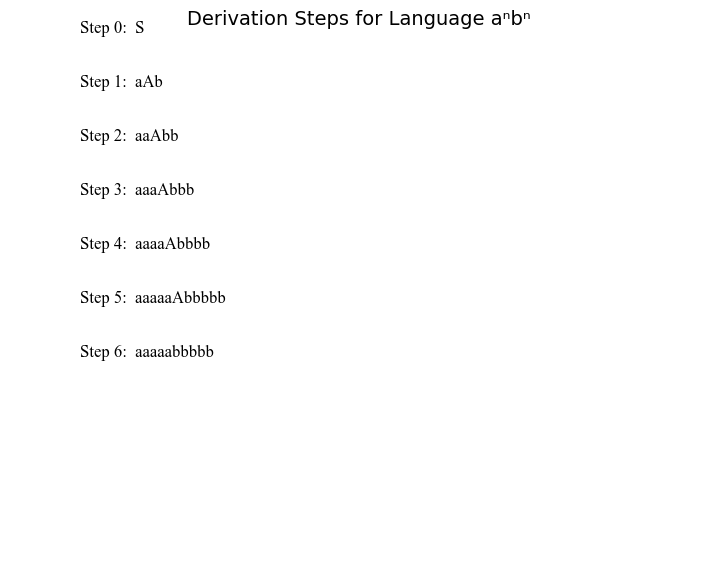

In [4]:
### Visualization Sample:

#  Define the production rules
def derive(cfg_string):
    if 'S' in cfg_string:
        return [cfg_string.replace('S', 'aAb', 1)]
    elif 'A' in cfg_string:
        return [cfg_string.replace('A', 'aAb', 1), cfg_string.replace('A', '', 1)]
    return []

def visualize_derivation(steps):
    plt.figure(figsize=(9, len(steps)))
    plt.axis('off')

    for i, step in enumerate(steps):
        plt.text(0.1, 1 - i * 0.1, f"Step {i}:  {step}", fontsize=12, family='Times New Roman')

    plt.title("Derivation Steps for Language aⁿbⁿ", fontsize=14)
    plt.show()

# This makes the derivation from each variable from its on respected factor
def generate_anbn(n):

    steps = []
    current = 'S'
    steps.append(current)

    # We substitute the variable S with 'aAb'
    current = current.replace('S', 'aAb')
    steps.append(current)

    # Substitute A to 'aAb', (n-1) times
    for _ in range(n - 1):
        current = current.replace('A', 'aAb', 1)
        steps.append(current)

    # Replacing 'A' with ε
    current = current.replace('A', '', 1)
    steps.append(current)

    return steps

# Example usage:
n = 5  # You can change this value
steps = generate_anbn(n)
visualize_derivation(steps)


### Context-Free Grammar vs. Context-Sensitive Grammar

Another way to help understand CFG is to compare this to CSG (Context-Sensitive Grammar). CSG is a formal grammar which the LHS and the RHS of any production rule may be surrounded by a context of terminal and nonterminal symbols.

With the same concept as CFG, we can define this using four tuples:

$ CSG: (\sum, V, S, P)$

CSG: Set of production rules with help ofc which we can generate the string of language

* $\sum$: Set of terminal symbols
* $V$: Set of finite non-terminal symbols
* $S$: Start variable
* $P$: Production Rules

CSG can be seen and applied in these cases:

1. Natural languages cannot be designed using context free grammar but it can be produce using context sensitive grammar (CSG).
1. An inferior model of CSG knows as “linear Context Free rewriting System “ is used to produce Natural languages
1. Decision issue for CSG is PSPACE — complete


# Parsing and Formal Grammar

As we have defined earlier, grammar is basically rules which are implemented in sentences and strings. Imagine parsing as like figuring out whether a sentence "makes sense" based on grammar rules.Connecting this into computer science, parsing helps a program break down a sentence (or input) and check its structure.

Visualize making a sandwich or building a LEGO model:

- Grammar rules are like step-by-step instructions.

- Parsing is checking if you followed the instructions correctly.

In language, the sentence “The dog runs” makes sense, but “Runs the dog” sounds off.
Parsing helps a computer figure out the same thing — whether the structure is valid. We use something called a syntax tree to represent the structure of a sentence. Each "branch" of the tree shows how small parts come together to make the full sentence. 

Think of it this way, you have a sentence in English:

**Input** = “The dog runs” 

**Thinking if** = “Runs the dog” (technically correct in poetry maybe, but not standard)

In computing, grammar rules look like this:

1. S → NP VP

1. NP → Det Noun

1. VP → Verb

If you sum it all up, it is basically saying that:

- A Sentence (S) is made of a Noun Phrase (NP) followed by a Verb Phrase (VP)

- A Noun Phrase (NP) is made of a Determiner (Det) and a Noun

- A Verb Phrase (VP) is just a Verb

You can imagine this like a board game or cookie-cutter:

Each shape fits together in a certain way.

If you follow the rules, the final sentence is “legal”.

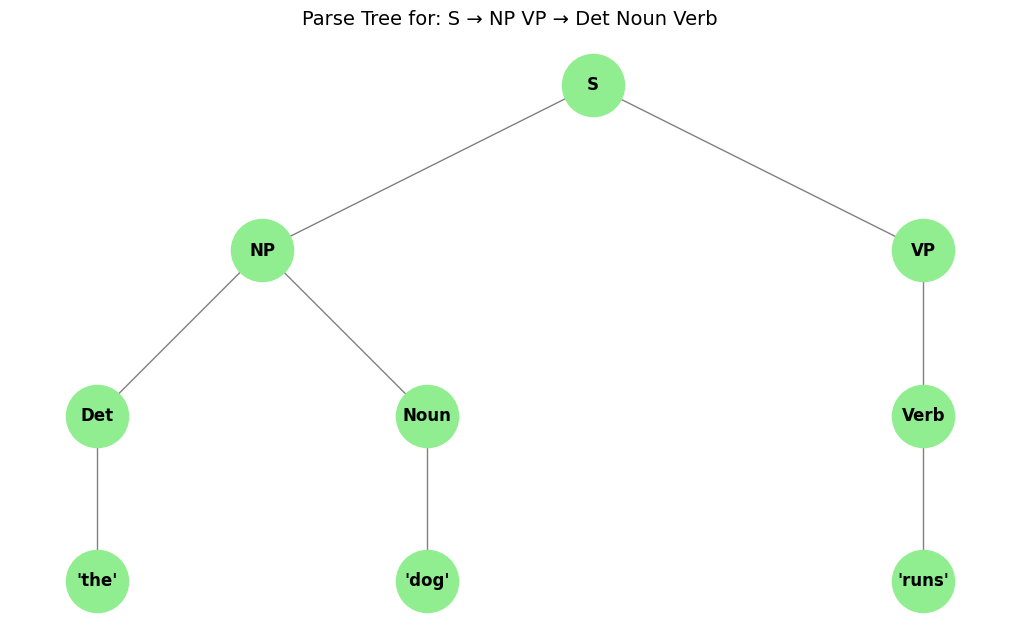

In [ ]:
# Define CFG-based binary tree structure for: S → NP VP → Det Noun Verb
edges = [
    ("S", "NP"), ("S", "VP"),
    ("NP", "Det"), ("NP", "Noun"),
    ("VP", "Verb"),
    ("Det", "'the'"), ("Noun", "'dog'"), ("Verb", "'runs'")
    ]   


G = nx.DiGraph()
G.add_edges_from(edges)

pos = {
    "S": (0, 4),
    "NP": (-2, 3), "VP": (2, 3),
    "Det": (-3, 2), "Noun": (-1, 2), "Verb": (2, 2),
    "'the'": (-3, 1), "'dog'": (-1, 1), "'runs'": (2, 1)
}

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=False,
        node_color='lightgreen', node_size=2000,
        font_size=12, font_weight='bold', edge_color='gray')
plt.title("Parse Tree for: S → NP VP → Det Noun Verb", fontsize=14)
plt.axis('off')
plt.show()

### Chomsky's Normal Form

Chomsky Normal Form (CNF) is a standardized way of writing rules in a **context-free grammar (CFG)**. It simplifies how we parse languages, especially when using parsing algorithms like **CYK (Cocke-Younger-Kasami)**. 

CNF imposes a strict structure on grammar rules, allowing each rule to follow a specific and limited format. This structure eliminates irregularities that would otherwise complicate parsing.

By converting a grammar into CNF, we ensure that every rule fits into a form that a parser like CYK can systematically handle. Instead of dealing with varied rule lengths or mixed symbol types, the parser only needs to process two types of rules: **binary combinations** or **single terminals**. This standardization simplifies the parsing process and improves performance.

**Key Properties of CNF**

1. CFGs can be converted into different equivalent CNF forms.
1. The same language can be produce by CNF as the orginal CFG
1. Parsing algorithms commonly used in CNF algorithms like:
    * CYK algorithm for shopping membership checking
    * Compilers that uses bottom-up parsers
1. A string that have the length of n, CNF derivation requires at most $2n-1$ derivation steps
1. Any cfg that does not generate ϵ has an equivalent CNF

#### Conversion of CFG to CNF

Think of CNF as a more simply version of a context-free grammar(CFGs) which gives all productions rules to follow a specific pattern. In CNF, thoses rules either have **two non-terminal** symbols, or a **single terminal symbol**. In some cases, an empty string. Converting CFG into CNF is a crucial step in parsing algorithms, like the CYK algorithm, which helps in understanding each language strucuture.

#### Ex. Converting CFG to CNF

Visualize this, let us have a given CFG first as G1:
$$ S\rightarrow\; ASB$$
$$ A\rightarrow\; aAS \;|\; a\;|\;ε $$
$$ B\rightarrow\; SbS\; | \; A\; | \; bb $$

Step 1.

Start with symbol $S$ first as it appears on the RHS which will create a new production rule $S0\rightarrow S$. Which the grammar will become like this:
$$S0\rightarrow S$$
$$ S\rightarrow\; ASB$$
$$ A\rightarrow\; aAS \;|\; a\;|\;ε $$
$$ B\rightarrow\; SbS\; | \; A\; | \; bb $$

Step 2.

If a grammar contains a null production $A \rightarrow ε$, the grammar will become:
$$ S0 \rightarrow S$$
$$ S\rightarrow\; ASB\; |\; SB$$
$$  A\rightarrow\; a \;|\; aAS\;|\;aS  $$ 
$$ B\rightarrow\; SbS\; | \; A\; |\;ε\; |\; bb $$

Which then will create a null production of $B\rightarrow \; ε$, and its removal will result to:

$$ S0 \rightarrow S$$
$$ S\rightarrow\; AS\; |\; S\; |\; ASB\; | \; SB$$
$$  A\rightarrow\; a \;|\; aAS\;|\;aS  $$
$$ B\rightarrow\; SbS\; | \; A\;  |\; bb $$ 

After that, it will yield an unit production of $B \rightarrow A$ and its removal will result to:

$$ S0 \rightarrow S$$
$$ S\rightarrow\; AS\; |\; ASB\; |\; SB\; | \; S$$
$$  A\rightarrow\; a \;|\; aAS\;|\;aS  $$
$$ B\rightarrow\; SbS\; | \;bb\;  |\; aAS\; |\; aS\; |\; a $$ 

next will be the removal of the unit production of $ S0 \rightarrow S$ which will result to a grammar that looks like:

$$ S0 \rightarrow AS\; |\; ASB\; |\; SB\; |\; S$$
$$ S\rightarrow\; AS\; |\; ASB\; |\; SB\; |\; S$$
$$  A\rightarrow\; aAS \;|\; aS\;|\;a  $$
$$ B\rightarrow\; SbS\; | \;bb\;  |\; aAS\; |\; aS\; |\; a $$ 

lastly, we can remove the unit production $S\rightarrow S$ and $S0\rightarrow S$ from the grammar which will give us:

$$ S0 \rightarrow AS\; |\; ASB\; |\; SB$$
$$ S\rightarrow\; AS\; |\; ASB\; | \; SB$$
$$  A\rightarrow\; aAS \;|\; aS\;|\;a  $$
$$ B\rightarrow\; SbS\; | \;bb\;  |\; aAS\; |\; aS\; |\; a $$ 

Step 3.

In producction rule $A\rightarrow\; aAS\; |\; aS\; and\; B\rightarrow\;  SbS\;  |\;  aAS\; |\; aS$, the terminal a and b exist on RHS with non-terminates. Remove them from RHS:
$$ S0\rightarrow\; AS\; |\; ASB\; |\; SB $$
$$ S\rightarrow\; AS\; |\; ASB\; |\; SB $$
$$ A\rightarrow\; XAS\; |\; XS\; |a $$
$$ B\rightarrow\; SYS\; |\; bb\; |\; XAS\; |\; XS\; |\; a $$
$$ X\rightarrow a $$
$$ Y\rightarrow b $$

and since $ B\rightarrow\; bb $ cannot be part of CNF, removing it should give a grammar:
$$ S0\rightarrow\; AS\; |\; ASB\; |\; SB $$
$$ S\rightarrow\; AS\; |\; ASB\; |\; SB $$
$$ A\rightarrow\; XAS\; |\; XS\; |a $$
$$ B\rightarrow\; SYS\; |\; YY\; |\; XAS\; |\; XS\; |\; a $$
$$ X\rightarrow a $$
$$ Y\rightarrow b $$

Step 4.

In production rule $ S0\rightarrow ASB$, $ S\rightarrow ASB $, RHS has more than two symboles, removing them should yield a grammar:
$$ S0\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ S\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ A\rightarrow\; XAS\; |\; XS\; |a $$
$$ B\rightarrow\; SYS\; |\; YY\; |\; XAS\; |\; XS\; |\; a $$
$$ X\rightarrow\; a $$
$$ Y\rightarrow\; b $$
$$ P\rightarrow\; AS $$

Since, $ A\rightarrow XAS$ has more than two symbols, remove it from grammar:
$$ S0\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ S\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ A\rightarrow\; RS\; |\; XS\; |\; a $$
$$ B\rightarrow\; SYS\; |\; YY\; |\; RS\; |\; XS\; |\; a $$
$$ X\rightarrow\; a $$
$$ Y\rightarrow\; b $$
$$ P\rightarrow\; AS $$
$$ R\rightarrow\; XA $$

Lastly, we also do this for the rule of $ B\rightarrow SYS$ since it has more than two symbols, we remove it from the grammar:
$$ S0\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ S\rightarrow\; AS\; |\; PB\; |\; SB $$
$$ A\rightarrow\; RS\; |\; XS\; |a $$
$$ B\rightarrow\; TS\; |\; YY\; |\; RS\; |\; XS\; |a $$
$$ X\rightarrow\; a $$
$$ Y\rightarrow\; b $$
$$ P\rightarrow\; AS $$
$$ R\rightarrow\; XA $$
$$ T\rightarrow\; SY $$


### Dynamic programming for parsing

In CYK algorithm, we use DP to avoid recalculating the same subproblems over and over.

Parsing involves checking if parts of a sentence can be generated by the grammar and we often reuse these parts.

Instead of recomputing them repeatedly, we store the results in a table.



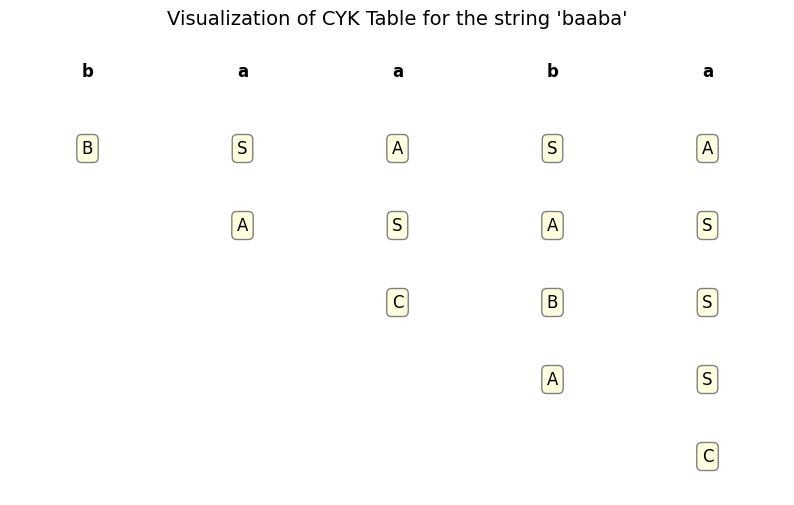

In [8]:
cyk_table = [
    [{'B'}, {'S'}, {'A'}, {'S'}, {'A'}],
    [set(), {'A'}, {'S'}, {'A'}, {'S'}],
    [set(), set(), {'C'}, {'B'}, {'S'}],
    [set(), set(), set(), {'A'}, {'S'}],
    [set(), set(), set(), set(), {'C'}],
]

# parsed string
words = list("baaba")
n = len(words)


fig, ax = plt.subplots(figsize=(10, 6))

# Loop for the table
for i in range(n):
    for j in range(i, n):
        content = ','.join(sorted(cyk_table[i][j])) if cyk_table[i][j] else ''
        ax.text(j, i, content, ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="gray"))


for idx, char in enumerate(words):
    ax.text(idx, -1, char, ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(n - 0.5, -1.5)
ax.axis('off')

plt.title("Visualization of CYK Table for the string 'baaba'", fontsize=14)
plt.show()


# CYK Algorithm and Implementation
The CYK algorithm (Cocke–Younger–Kasami) is a bottom-up parsing algorithm used to determine if a string can be generated by a context-free grammar (CFG) in Chomsky Normal Form (CNF).

It constructs a dynamic programming table to evaluate all possible ways to derive substrings of the input from grammar rules. If the start symbol of the grammar derives the entire input string, the string is accepted by the grammar.

- **Goal:** Determine if a string `w` belongs to the language generated by a CFG.
- **Input:** A CNF grammar and an input string of `n` words.
- **Output:** Yes/No (Is the string derivable from the grammar?)

**Key Idea:**\
It constructs a triangular table `T[i][j]`, where each cell contains the set of non-terminals that can generate the substring `w[i..j]`.

**Time Complexity:** O(n³ * |P|), where |P| is the number of productions.


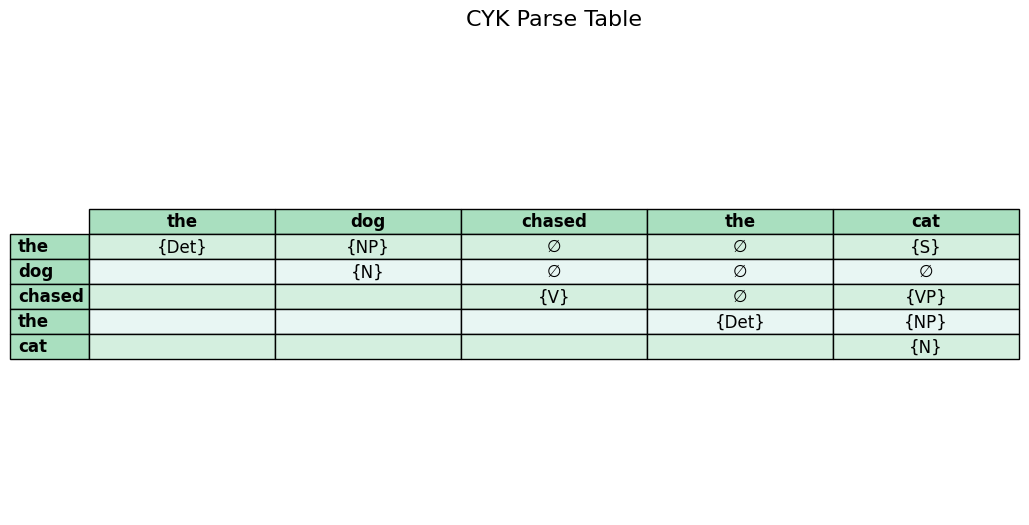

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example sentence and CYK table (parsed output as sets)
sentence = ["the", "dog", "chased", "the", "cat"]
cyk_table = [
    [{"Det"}, {"NP"}, set(), set(), {"S"}],
    [None, {"N"}, set(), set(), set()],
    [None, None, {"V"}, set(), {"VP"}],
    [None, None, None, {"Det"}, {"NP"}],
    [None, None, None, None, {"N"}]
]

# Helper to format cells
def format_cell(cell):
    if isinstance(cell, set) and cell:
        return "{" + ",".join(sorted(cell)) + "}"
    elif isinstance(cell, set):
        return "∅"
    return ""

# Format table
formatted_table = [
    [format_cell(cell) for cell in row] for row in cyk_table
]

# Make a DataFrame
df = pd.DataFrame(formatted_table, columns=sentence, index=sentence)

# Plot table with style
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    rowLabels=df.index,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor("#a9dfbf")  # header green
    elif row % 2 == 0:
        cell.set_facecolor("#e8f6f3")  # light green
    else:
        cell.set_facecolor("#d4efdf")  # darker green

plt.title("CYK Parse Table", fontsize=16, pad=20)
plt.show()


### CYK Table Interpretation

The table above represents the **CYK parse table** generated for the input sentence:  
**"the dog chased the cat"** using a grammar in **Chomsky Normal Form (CNF)**.

#### Diagonal Cells (Base Case)
- These represent the terminal words in the sentence.
- Each word is matched with a rule that directly generates it.
- Example:  
  - `"the"` → `{Det}`  
  - `"dog"` → `{N}`  
  - `"chased"` → `{V}`

#### Above-Diagonal Cells
- These show all **valid combinations of non-terminals** that can derive substrings of length ≥ 2.
- Built using binary production rules from the grammar.
- Example rules:  
  - `NP → Det N`  
  - `S → NP VP`

#### Empty Cells (∅)
- These indicate **no valid derivation** exists for the given substring.
- Helps identify parsing paths that fail under the current grammar.

> The sentence is **grammatically valid** if the start symbol (e.g., `S`) appears in the **top-right cell** of the table.


# Extensions

*When CNF conversion is a problem*
*Efficiency and limitations*
 

# Summary